In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [3]:
# Import dataset
df = pd.read_csv("../data/raw/adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
# Convert object variables into categorical ones

categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    df[col] = pd.Categorical(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


In [5]:
# Mapping income variable so that
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})


In [6]:
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
race              category
sex               category
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native.country    category
income            category
dtype: object

In [7]:
df.shape

(32561, 15)

## Missing values

In [8]:
df.replace('?', np.nan, inplace=True)
df

C:\Users\keita\AppData\Local\Temp\ipykernel_8248\3589284985.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace('?', np.nan, inplace=True)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [9]:
# Count missing values
missing_values = df.isnull().sum()
missing_values


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

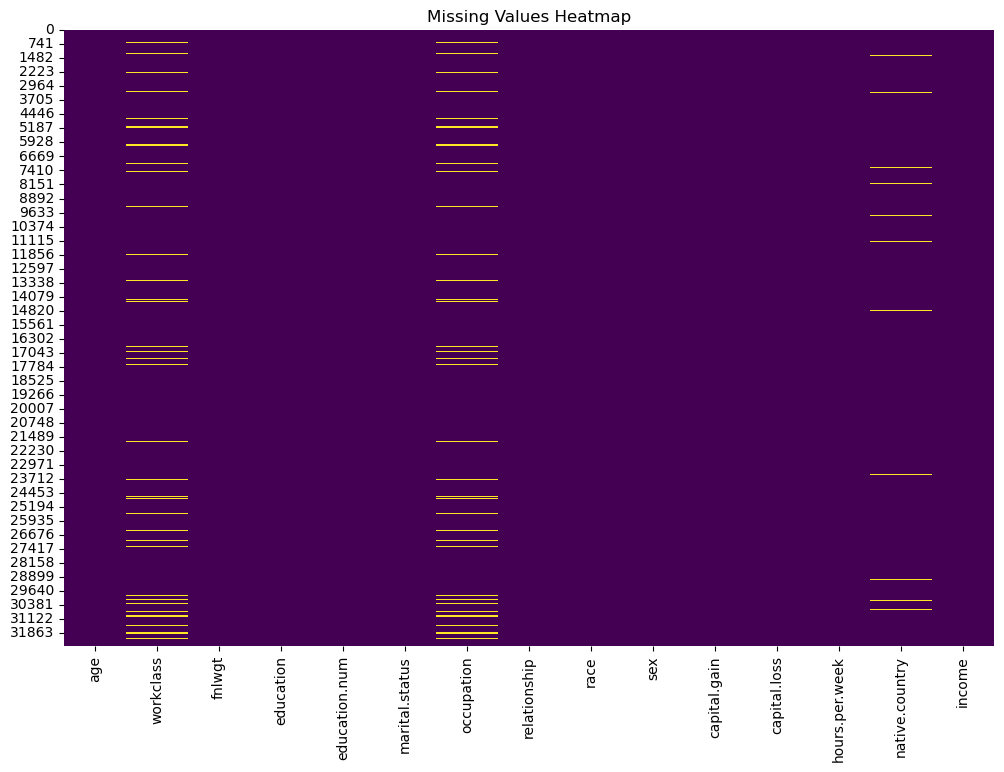

In [10]:
# Visualize missing values as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

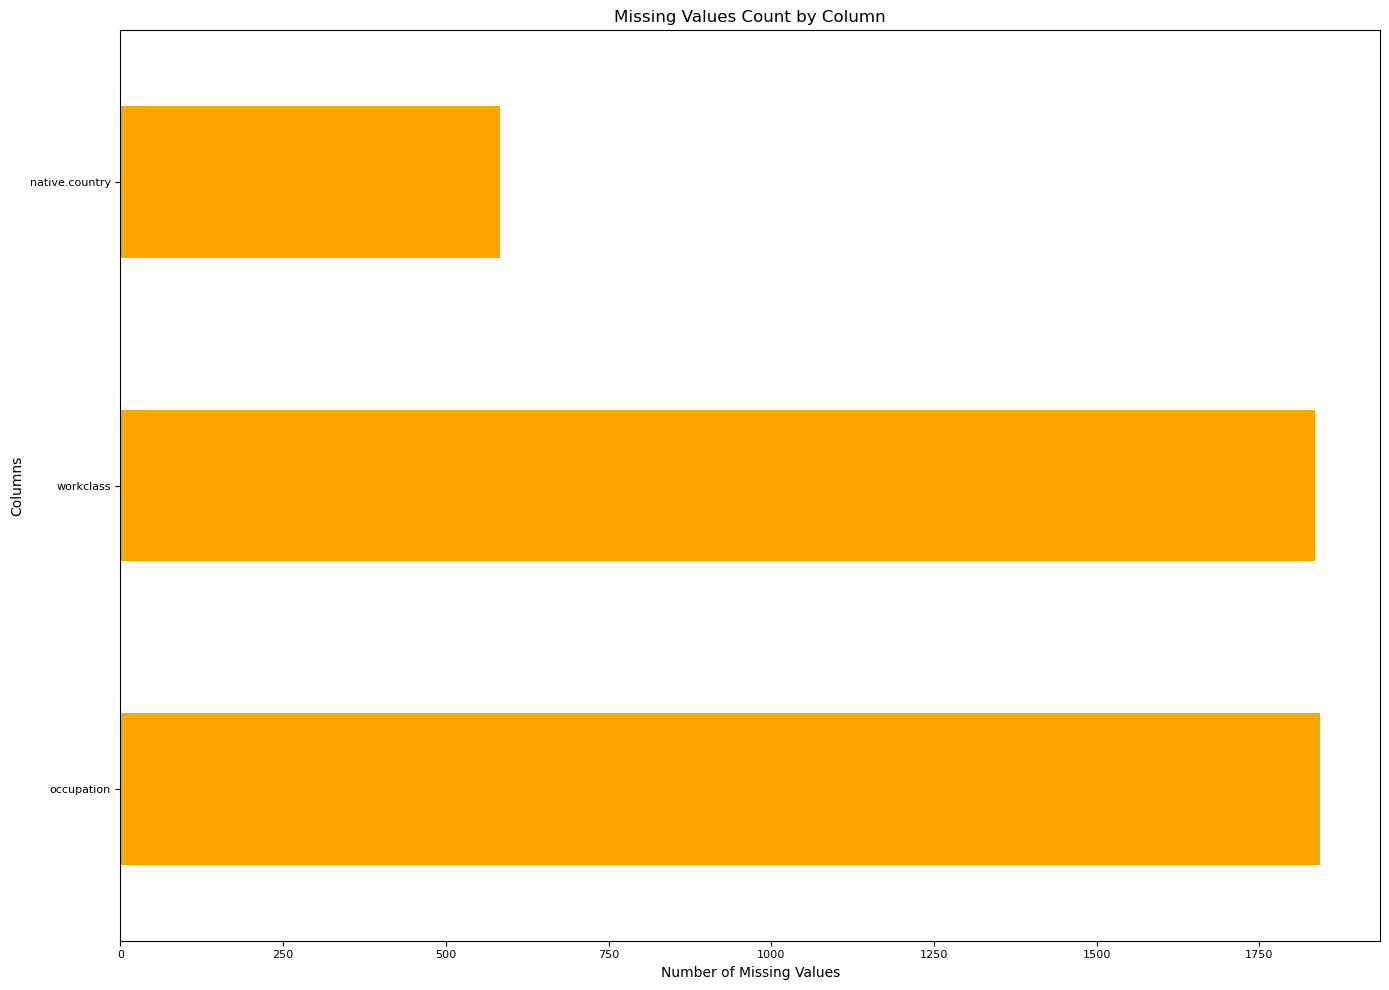

In [11]:
# Bar plot of missing values for each column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

plt.figure(figsize=(14, 10))
missing_values.plot(kind='barh', color='orange')
plt.title('Missing Values Count by Column', fontsize=12)
plt.xlabel('Number of Missing Values', fontsize=10)
plt.ylabel('Columns', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [12]:
# Compute percentage of missing
total_missing = df.isnull().sum().sum()
total_values = df.size
missing_percentage = (total_missing / total_values) * 100
missing_per_column = (df.isnull().sum() / len(df)) * 100
missing_per_column

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [13]:
# Dropping na
df.dropna(inplace=True)

In [14]:
df.shape

(30162, 15)

So 2399 obs were removed equals to 7% of the dataset

In [15]:
df.to_csv("../data/raw/adult_no_missing.csv", index=False)

In [16]:
income_percentages = df['income'].value_counts(normalize=True) * 100
income_percentages

income
0    75.107751
1    24.892249
Name: proportion, dtype: float64

In 1994, the American median salary was $32,264. Therefore, this dataset can be considered a good representation of American salaries, with 25% of workers earning more than $50,000. As a result, there is no need to adjust the posteriors.

## Grouping levels of variables

In [17]:
# Grouping some levels of native.country
native_country_counts = df['native.country'].value_counts()
print("Count for each level of native.country:")
print(native_country_counts)

Count for each level of native.country:
native.country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Haiti                            42
Iran                             42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece   

In [18]:
europe = ['Germany', 'Italy', 'England', 'Poland', 'Portugal', 'Greece', 'France',
          'Ireland', 'Scotland', 'Hungary', 'Yugoslavia', 'Holand-Netherlands']
asia = ['Philippines', 'India', 'China', 'Vietnam', 'Japan', 'Iran', 'Taiwan',
        'Cambodia', 'Thailand', 'Laos', 'Hong']
sudamerica = ['Cuba', 'Columbia', 'Haiti', 'Dominican-Republic', 'Ecuador',
              'Guatemala', 'Peru', 'El-Salvador', 'Nicaragua', 'Trinadad&Tobago',
              'Jamaica', 'Puerto-Rico', 'Honduras']
africa = ['South']
oceania = ['Outlying-US(Guam-USVI-etc)']

def map_country(country):
    if country == 'United-States':
        return 'United States'
    elif country == 'Mexico':
        return 'Mexico'
    elif country == 'Canada':
        return 'Canada'
    elif country in europe:
        return 'Europe'
    elif country in asia:
        return 'Asia'
    elif country in sudamerica:
        return 'SudAmerica'
    elif country in africa:
        return 'Africa'
    elif country in oceania:
        return 'Oceania'
    else:
        return 'United States'

df['native.country.grouped'] = df['native.country'].apply(map_country)

df['native.country.grouped'].value_counts()

native.country.grouped
United States    27504
SudAmerica         729
Asia               634
Mexico             610
Europe             493
Canada             107
Africa              71
Oceania             14
Name: count, dtype: int64

In [19]:
# Grouping of occupation
occupation_counts = df['occupation'].value_counts()
print("Count for each level of occupation:")
occupation_counts

Count for each level of occupation:


occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [20]:
# Grouping of education
education_counts = df['education'].value_counts()
print("Count for each level of education:")
education_counts

Count for each level of education:


education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64

In [22]:
education_mapping = {
    'Preschool': 'Primary',
    '1st-4th': 'Primary',
    '5th-6th': 'Primary',
    '7th-8th': 'Middle',
    '9th': 'Middle',
    '10th': 'Middle',
    '11th': 'Middle',
    '12th': 'High School',
    'HS-grad': 'High School',
    'Some-college': 'Higher Education',
    'Assoc-voc': 'Higher Education',
    'Assoc-acdm': 'Higher Education',
    'Bachelors': 'Higher Education',
    'Prof-school': 'Higher Education',
    'Masters': 'Postgraduate',
    'Doctorate': 'Postgraduate'
}

df['education.grouped'] = df['education'].map(education_mapping)

education_grouped_counts = df['education.grouped'].value_counts()

print("Count for each grouped level of education:")
print(education_grouped_counts)

Count for each grouped level of education:
education.grouped
Higher Education    14579
High School         10217
Middle               2880
Postgraduate         2002
Primary               484
Name: count, dtype: int64


In [23]:
# Drop native.country and education
df.drop(columns=['education', 'native.country'], inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     30162 non-null  int64   
 1   workclass               30162 non-null  category
 2   fnlwgt                  30162 non-null  int64   
 3   education.num           30162 non-null  int64   
 4   marital.status          30162 non-null  category
 5   occupation              30162 non-null  category
 6   relationship            30162 non-null  category
 7   race                    30162 non-null  category
 8   sex                     30162 non-null  category
 9   capital.gain            30162 non-null  int64   
 10  capital.loss            30162 non-null  int64   
 11  hours.per.week          30162 non-null  int64   
 12  income                  30162 non-null  category
 13  native.country.grouped  30162 non-null  object  
 14  education.grouped       301

## Dataset overview

In [25]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Remove fnlwgt which represent the final weight. In other words, this is the number of people the census believes
the entry represents. So for simplicity we will remove this variable from the dataset

In [26]:
df.drop(columns=['fnlwgt'], inplace=True)

## Plot variables

In [28]:
# Convert object variables into categorical ones

categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    df[col] = pd.Categorical(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     30162 non-null  int64   
 1   workclass               30162 non-null  category
 2   education.num           30162 non-null  int64   
 3   marital.status          30162 non-null  category
 4   occupation              30162 non-null  category
 5   relationship            30162 non-null  category
 6   race                    30162 non-null  category
 7   sex                     30162 non-null  category
 8   capital.gain            30162 non-null  int64   
 9   capital.loss            30162 non-null  int64   
 10  hours.per.week          30162 non-null  int64   
 11  income                  30162 non-null  category
 12  native.country.grouped  30162 non-null  category
 13  education.grouped       30162 non-null  category
dtypes: category(9), int64(5)
me

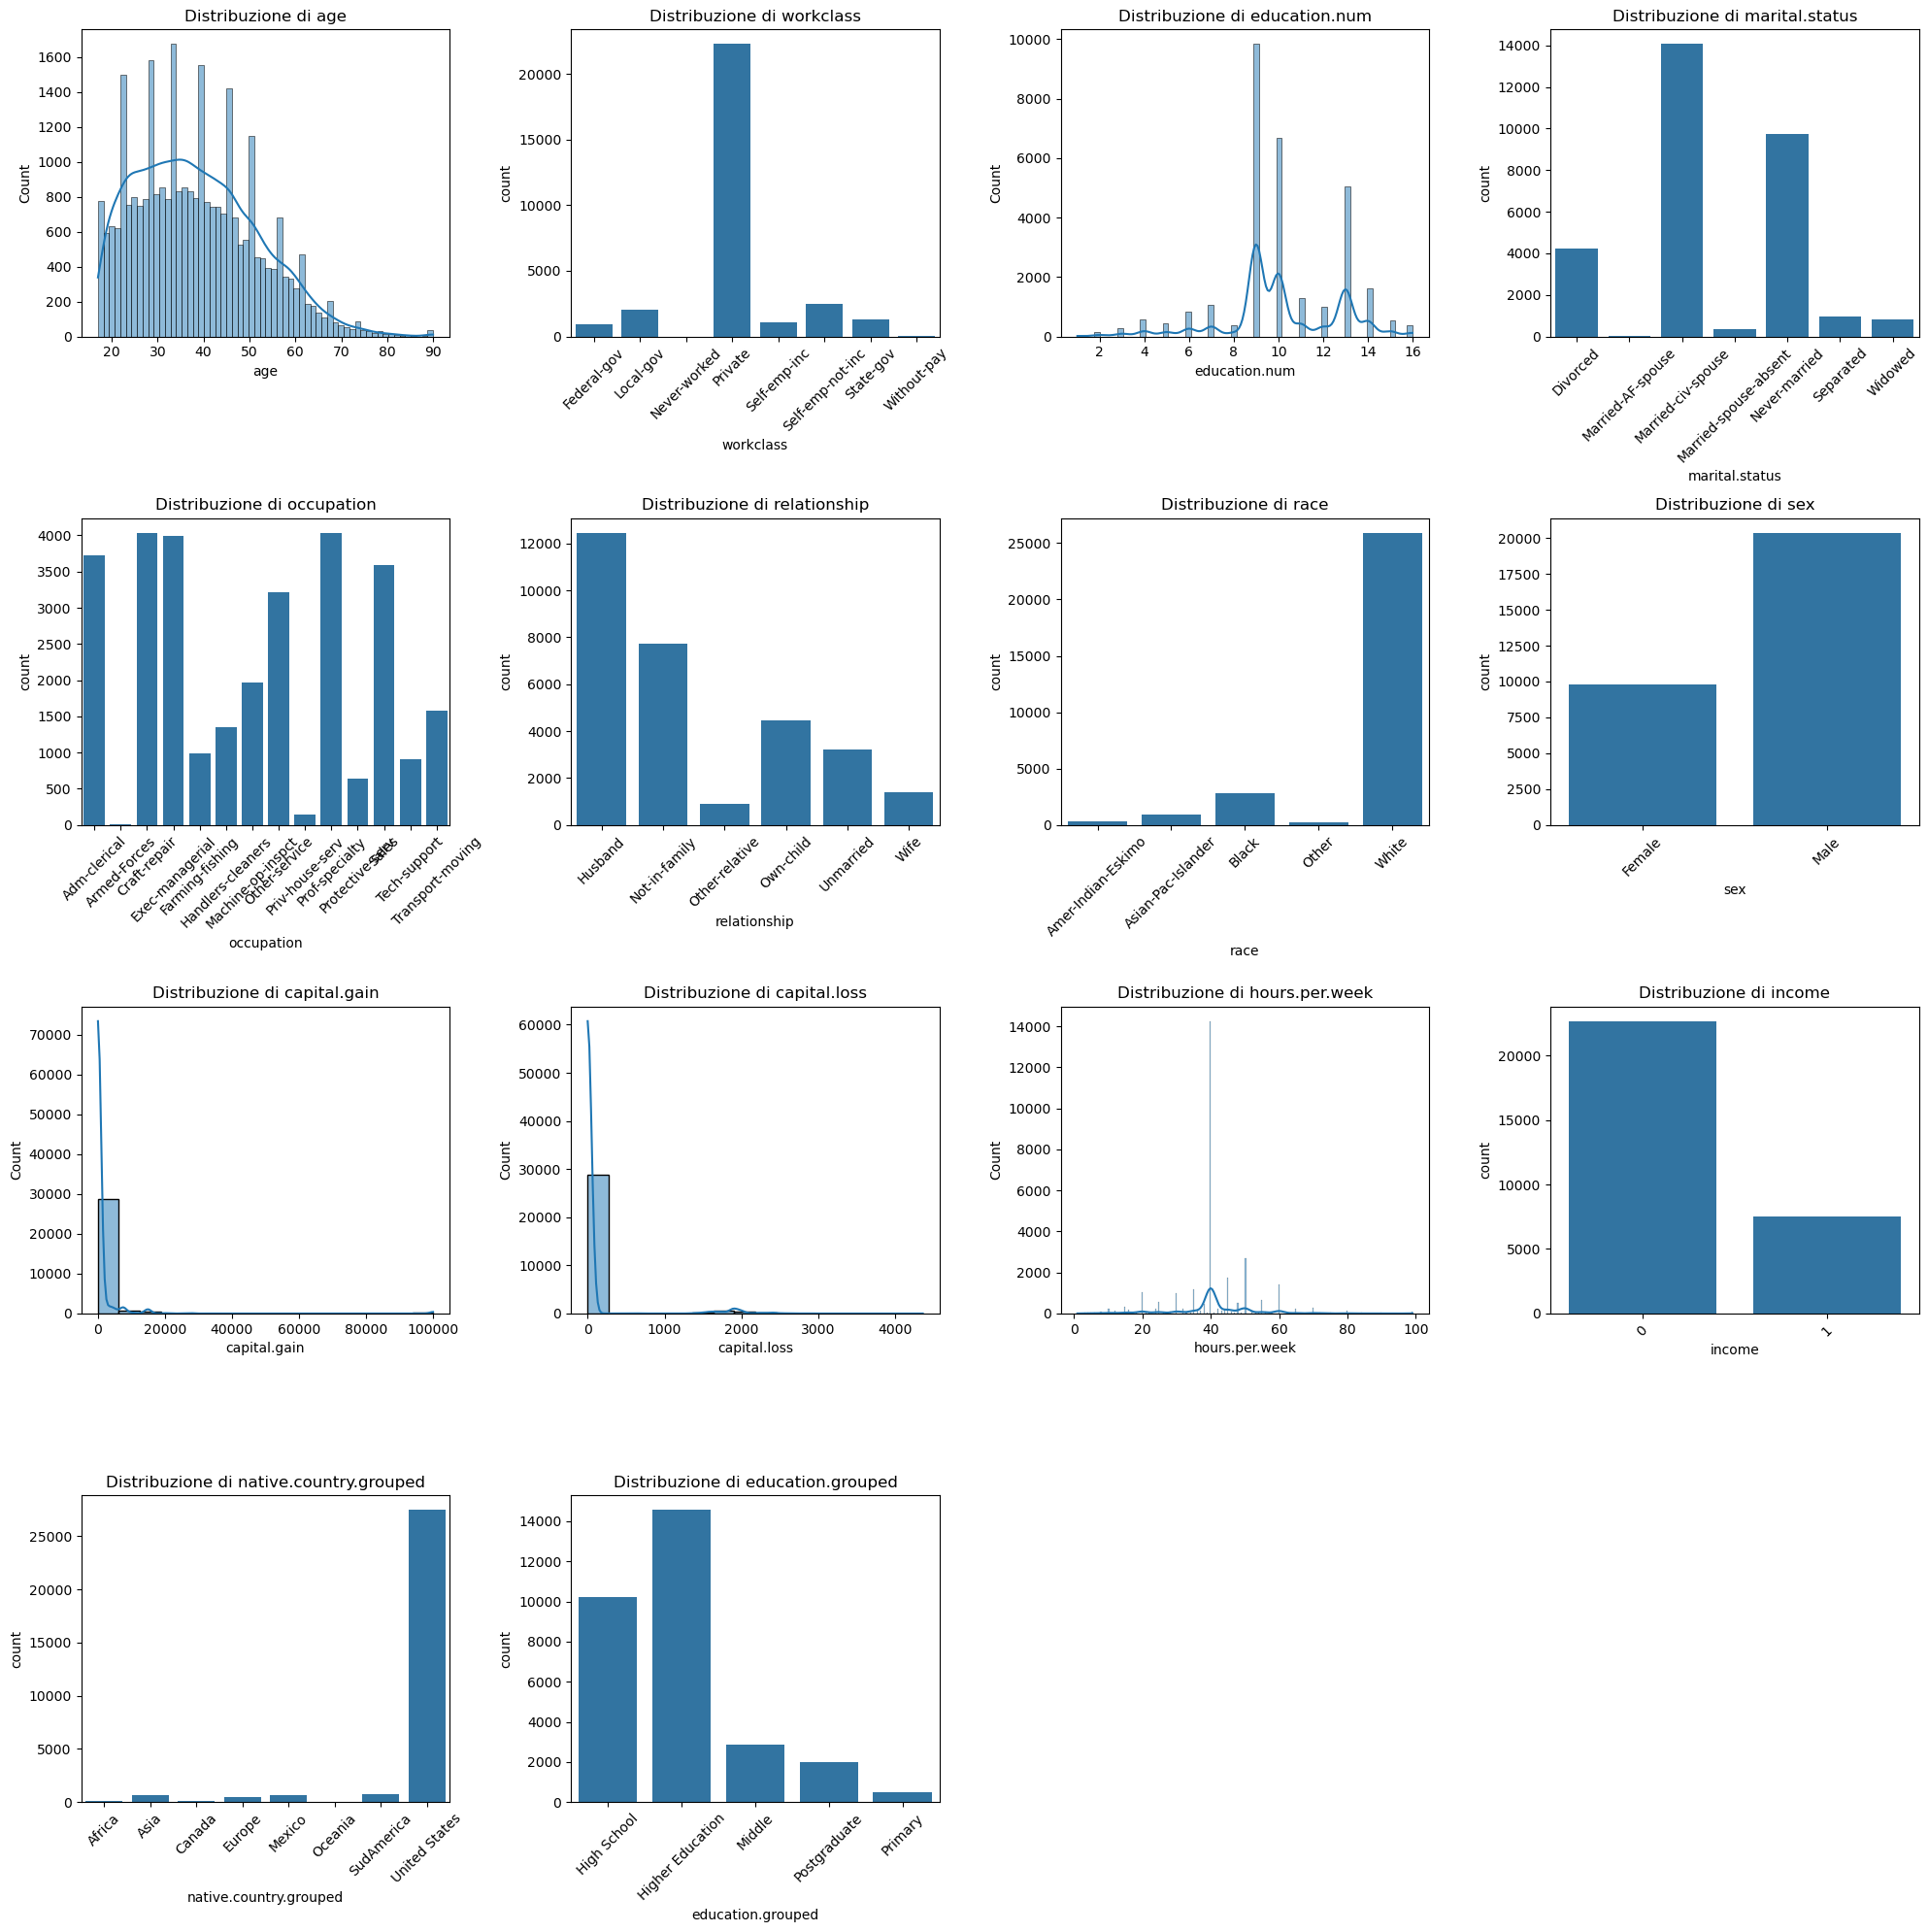

In [29]:
cols_per_row = 4

n_cols = len(df.columns)
rows = (n_cols // cols_per_row) + int(n_cols % cols_per_row > 0)

#layout
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(df[col], kde=True, ax=ax)
    else:
        sns.countplot(data=df, x=col, ax=ax)
        ax.tick_params(axis='x', rotation=45)
    ax.set_title(f"Distribuzione di {col}")


for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

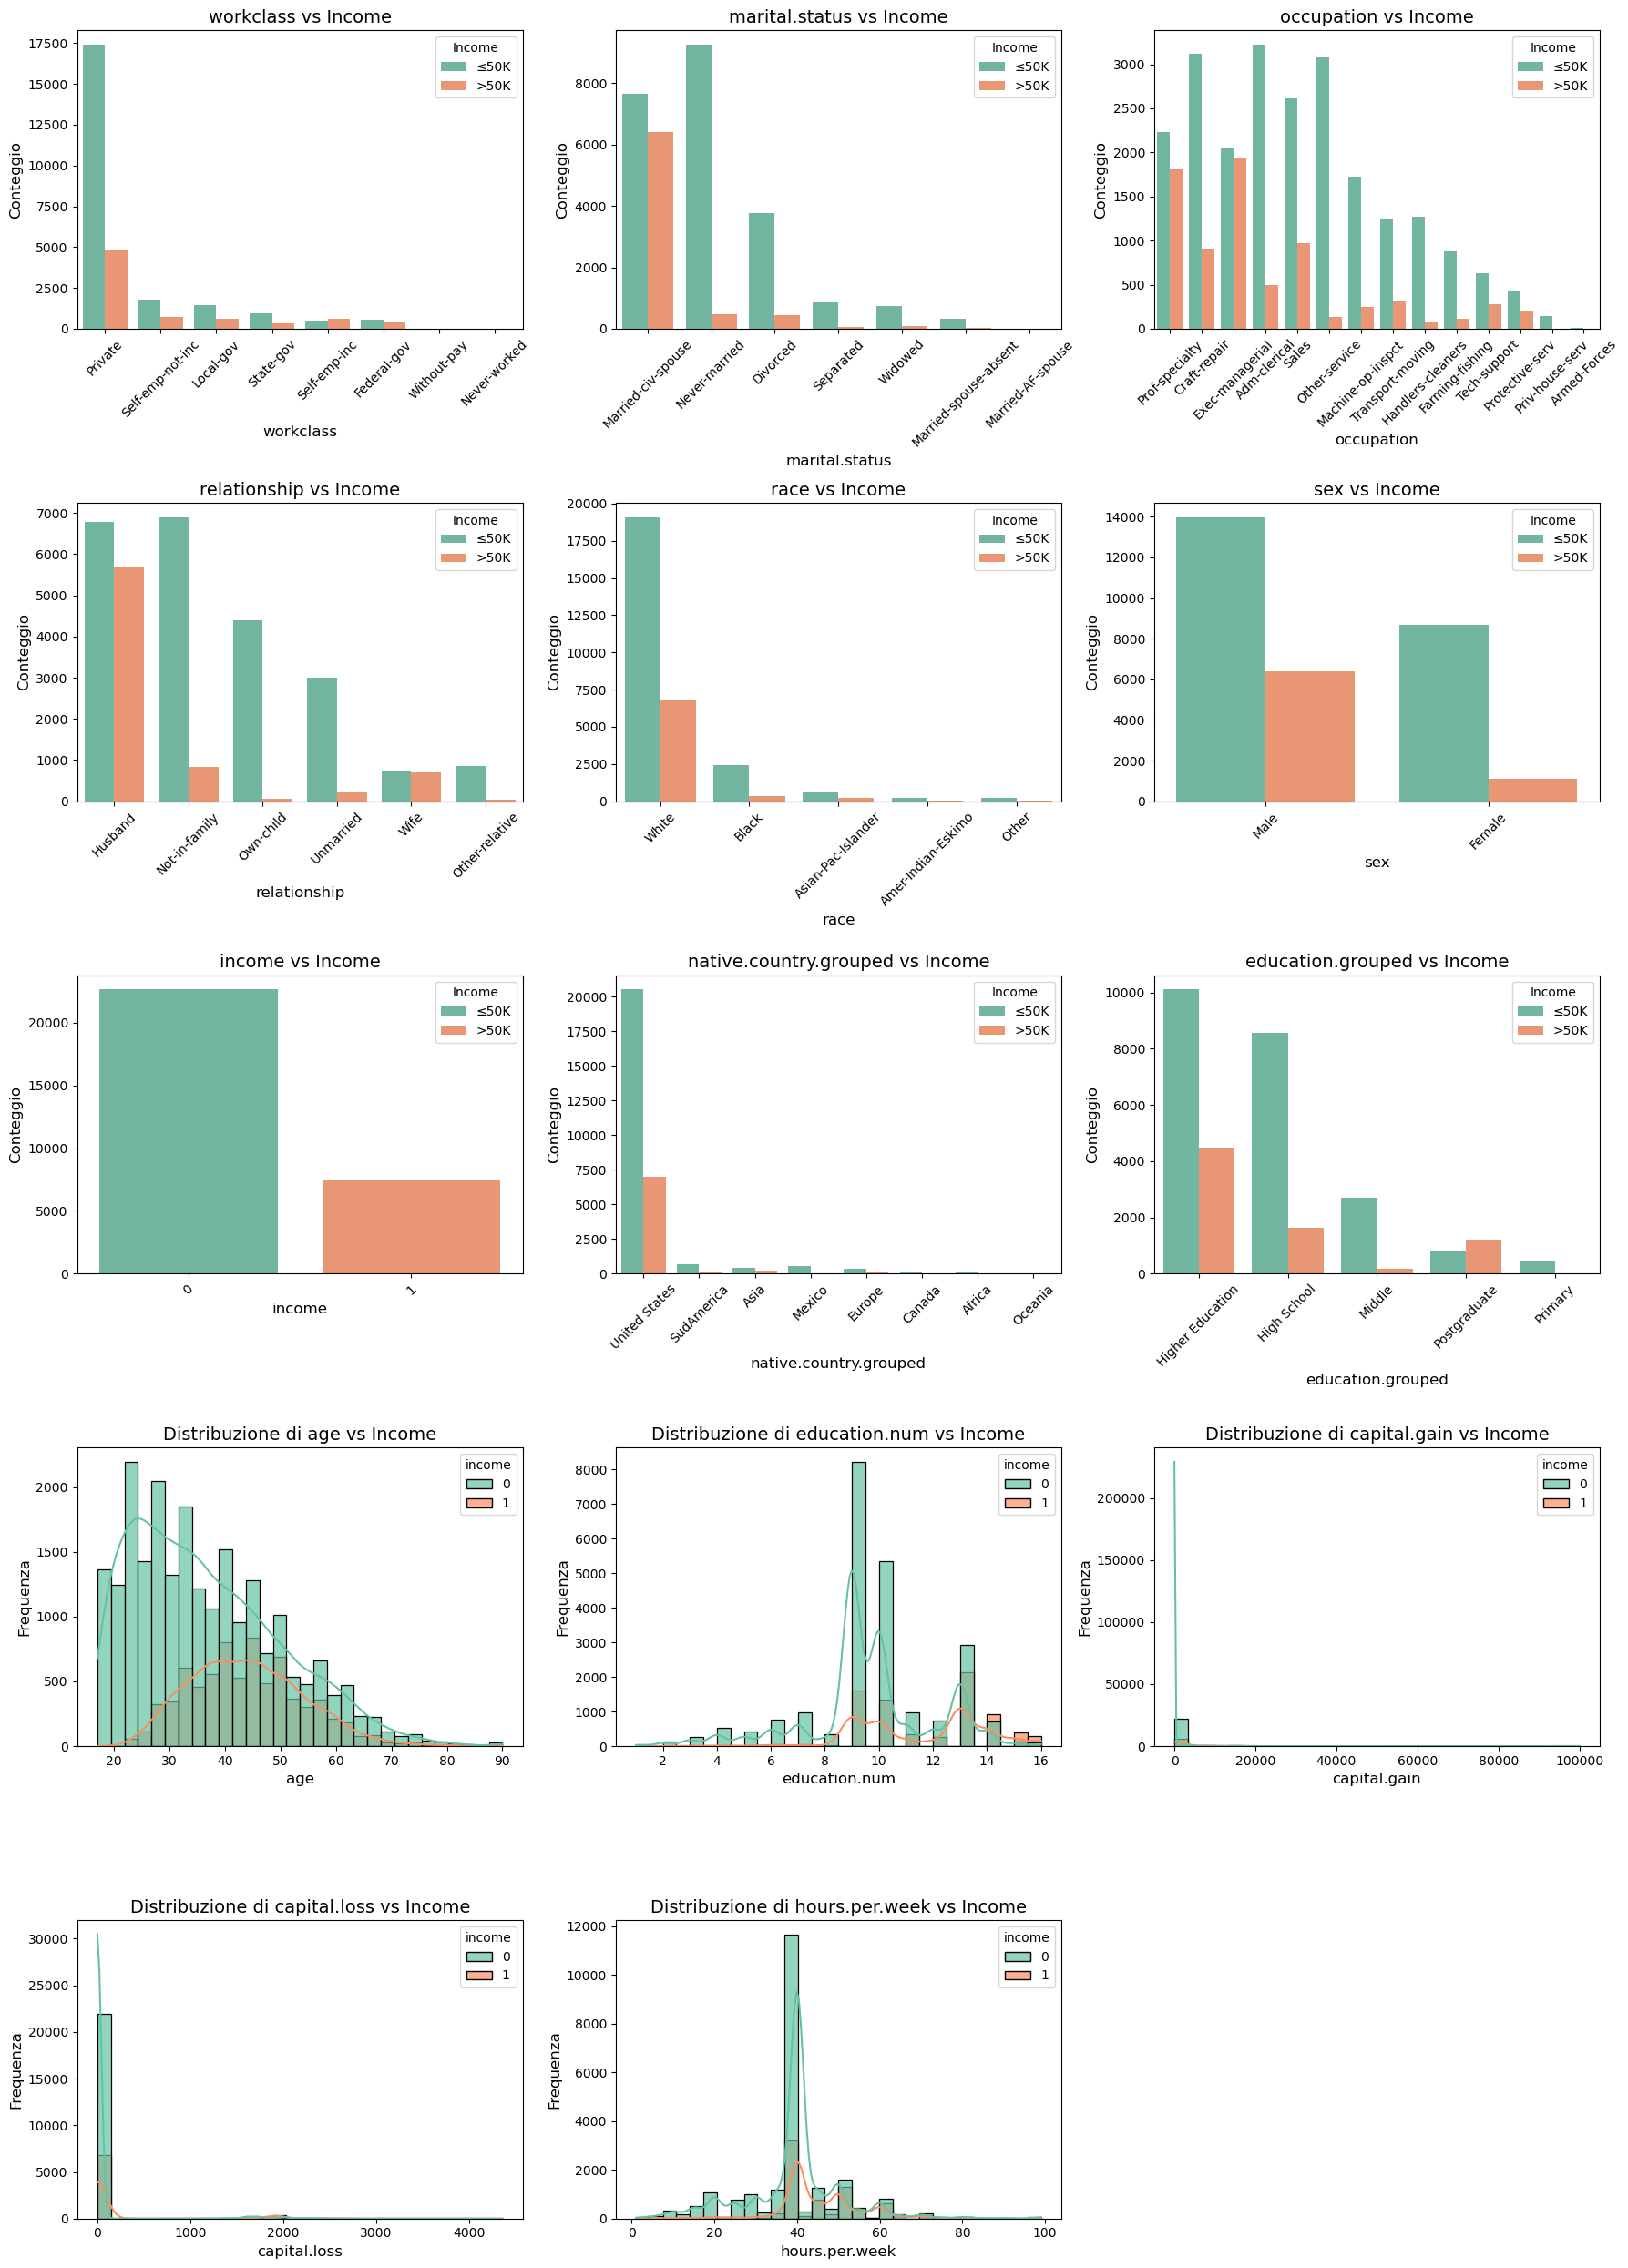

In [30]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

total_plots = len(categorical_columns) + len(numerical_columns)
rows = (total_plots + 2) // 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()

# 1. Plot categorical variables
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='income', palette='Set2', ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'{col} vs Income', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Conteggio', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Ruota le etichette per leggibilità
    axes[i].legend(title='Income', labels=['≤50K', '>50K'])

# 2. Plot numeric variables
for i, col in enumerate(numerical_columns, start=len(categorical_columns)):
    sns.histplot(data=df, x=col, kde=True, hue='income', palette='Set2', ax=axes[i], bins=30, alpha=0.7)
    axes[i].set_title(f'Distribuzione di {col} vs Income', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequenza', fontsize=12)

for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


No problem with separation :)

## Zero variance

In [31]:
variances = df.var(numeric_only=True)

print("Variance of different columns:")
print(variances)

Variance of different columns:
age               1.725194e+02
education.num     6.502474e+00
capital.gain      5.485397e+07
capital.loss      1.634572e+05
hours.per.week    1.435200e+02
dtype: float64


No problem!!!

In [23]:
# To csv
df.to_csv("../data/raw/adult_before_boruta.csv", index=False)

## Model selection

Done model selection using Boruta(see R code inside src folder) and all the variables were confirmed

## Split train and test

In [30]:
X = df.drop(columns=['income'])
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# To csv
X_train.to_csv('../data/processed/train_features.csv', index=False)
y_train.to_csv('../data/processed/train_labels.csv', index=False)

X_test.to_csv('../data/processed/test_features.csv', index=False)
y_test.to_csv('../data/processed/test_labels.csv', index=False)

## Undersampling

In [27]:
class_0 = df[df['income'] == 0]
class_1 = df[df['income'] == 1]

minority_size = min(len(class_0), len(class_1))

# Undersampling
class_0_downsampled = resample(class_0, replace=False, n_samples=minority_size, random_state=42)
class_1_downsampled = resample(class_1, replace=False, n_samples=minority_size, random_state=42)

df_balanced = pd.concat([class_0_downsampled, class_1_downsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Count values for each level
df_balanced['income'].value_counts()

income
0    7508
1    7508
Name: count, dtype: int64

### Split train and test

In [28]:
X_balanced = df_balanced.drop(columns=['income'])
y_balanced = df_balanced['income']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [29]:
# To csv
X_train_balanced.to_csv('../data/processed_undersampling/train_features.csv', index=False)
y_train_balanced.to_csv('../data/processed_undersampling/train_labels.csv', index=False)

X_test_balanced.to_csv('../data/processed_undersampling/test_features.csv', index=False)
y_test_balanced.to_csv('../data/processed_undersampling/test_labels.csv', index=False)

Undersampling significantly enhances performance. Therefore, refer to the `modeling_undersampling` notebook instead of the `modeling` notebook.